In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# 1. بارگذاری دیتاست MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. نرمال‌سازی داده‌ها
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test  = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

# 3. تبدیل برچسب‌ها به One-hot
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

# 4. ساخت مدل CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # چون 10 کلاس داریم
])

# 5. کامپایل مدل
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 6. آموزش مدل
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# 7. ارزیابی مدل
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\n🎯 دقت مدل روی داده‌های تست: {test_acc:.2f}')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 48s 55ms/step - accuracy: 0.8723 - loss: 0.4318 - val_accuracy: 0.9870 - val_loss: 0.0542
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 78s 51ms/step - accuracy: 0.9826 - loss: 0.0570 - val_accuracy: 0.9800 - val_loss: 0.0679
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 50ms/step - accuracy: 0.9879 - loss: 0.0385 - val_accuracy: 0.9907 - val_loss: 0.0356
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.9905 - loss: 0.0303 - val_accuracy: 0.9900 - val_loss: 0.0365
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 83s 51ms/step - accuracy: 0.9935 - loss: 0.0221 - val_accuracy: 0.9880 - val_loss: 0.0421
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9882 - loss: 0.0366

🎯 دقت مدل روی داده‌های تست: 0.99


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step

📊 Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.98      0.99       892
           6       0.98      0.99      0.99       958
           7       1.00      0.97      0.98      1028
           8       0.97      0.99      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


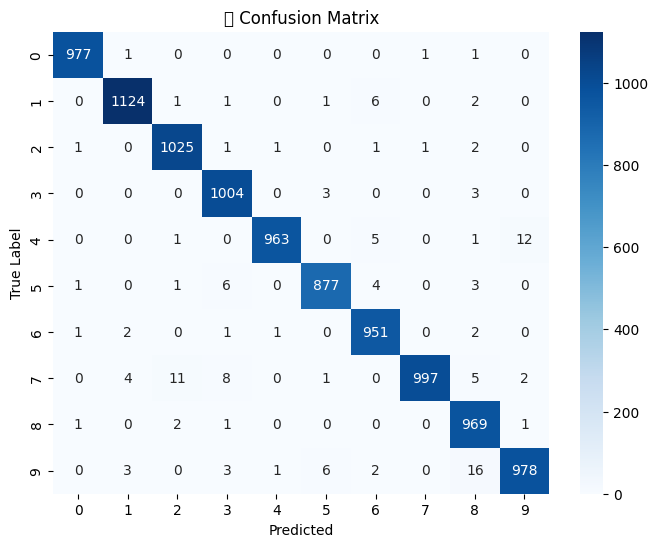

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


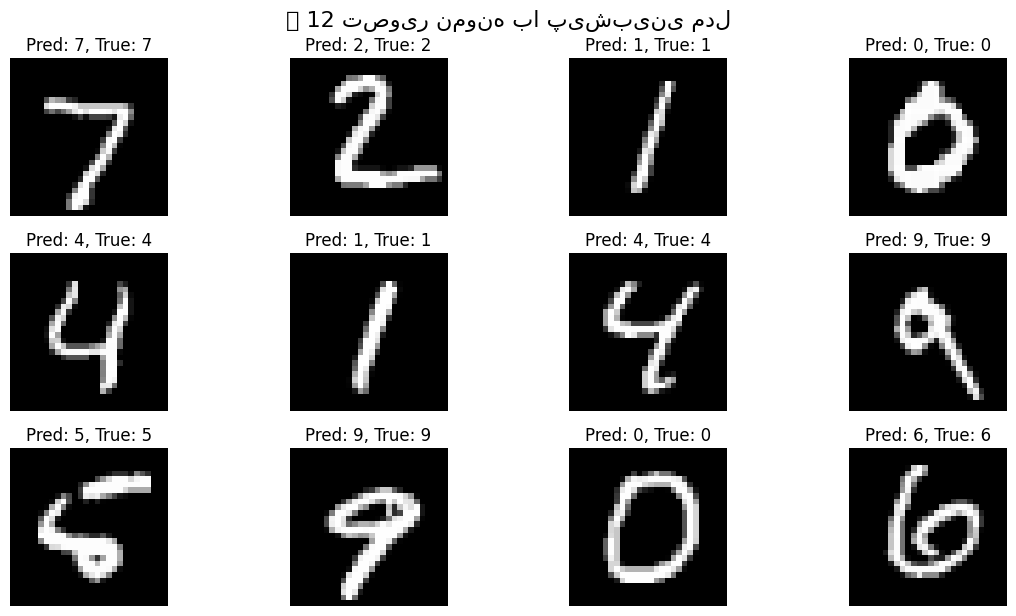

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# پیش‌بینی روی داده‌های تست
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# گزارش Precision، Recall و F1
print("\n📊 Classification Report:\n")
print(classification_report(y_true, y_pred))

# رسم ماتریس درهم‌ریختگی به صورت Heatmap
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("True Label")
plt.title("🔍 Confusion Matrix")
plt.show()

# نمایش 12 تصویر از دیتای تست با پیش‌بینی مدل
plt.figure(figsize=(12, 6))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {y_pred[i]}, True: {y_true[i]}")
    plt.axis('off')

plt.tight_layout()
plt.suptitle("🔎 12 تصویر نمونه با پیش‌بینی مدل", fontsize=16, y=1.02)
plt.show()
